#**Credit Card Fraud Detection**

**Anonymized credit card transactions labeled as fraudulent or genuine**

**About Dataset**  
**Context**    
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.  

**Context**    
The dataset contains transactions made by credit cards in September 2013 by European cardholders.  
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, **the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.** The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**  

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.  


### **Import the necessary libraries**

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Read the dataset**

In [168]:
credit =pd.read_csv("/content/drive/MyDrive/ML_project/ML_classification/Kaggle/Credit_Card_Fraud_Detection/creditcard.csv")

In [169]:
# Copying data to another variable to avoid any changes to original data
data=credit.copy()

### **Print the first and last 5 rows of the dataset**

In [170]:
# Display first five rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [171]:
# Display last 5 rows
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### **Understand the shape of the dataset**

In [172]:
# Check the shape of the data
data.shape

(284807, 31)

**Insights There are 284807 records and 31 columns in the dataset.**

### **Check the data types of the columns**

In [173]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **Check for missing values**

In [174]:
# Check if there are missing values.
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### **Analyze Summary Statistics of the dataset**

In [175]:
# Analyze the summary statistics for numerical variables

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Variable "Class" is dummy variable (1:Fraud; 0: No Fraud)   Need to convert to categorical value.

In [176]:
data["Class"]=data["Class"].astype("category")

In [177]:
print("After conversion:", data["Class"].dtype)

After conversion: category


In [178]:
print(data.isna().any().sum())

0


In [179]:
# Check summary for categorical data.

data.describe(include='category').T

,count,unique,top,freq
Class,284807,2,0,284315


In [180]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [181]:

data["Class"].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

The categorical data between 1 (Fraud) and 0 (No Fraud) are extreamly inbalanced.  
Fraud (1): 0.17%  
No Fraud (0): 99.83%  

In [182]:
cat = data.select_dtypes(['category']).columns.tolist()

In [183]:
cat

['Class']

Text(0.5, 0.95, 'Fraud Detection 0 = No fraud, 1 = Fraud')

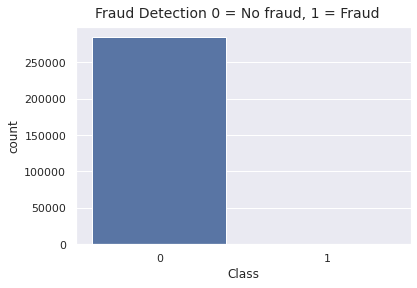

In [184]:
import seaborn as sns
sns.countplot(x='Class', data=data)
plt.suptitle("Fraud Detection 0 = No fraud, 1 = Fraud", y=0.95, fontsize=14)

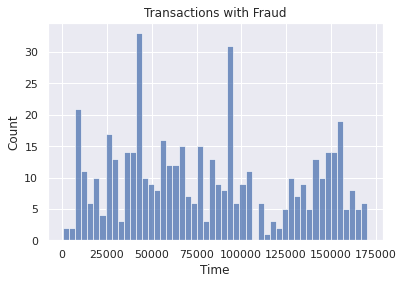

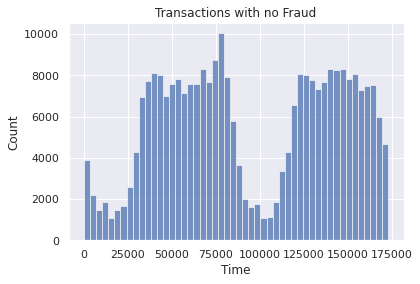

In [185]:
plot1 = sns.histplot(data["Time"][data.Class == 1], bins=50)
plot1.set_title("Transactions with Fraud")
plt.show()
plot1 = sns.histplot(data["Time"][data.Class == 0], bins=50)
plot1.set_title("Transactions with no Fraud")
plt.show()

In [186]:
# separating the data for analysis
no_fraud = data[data.Class == 0]
fraud = data[data.Class == 1]

In [187]:
print(no_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


### **Splitting the data into 80% train and 20% test set**

In [188]:
#Split the dataset
X = data.drop("Class", axis=1)
y=data["Class"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

**Make a Sample Data**  


In [189]:
from imblearn.under_sampling import NearMiss

In [190]:
knn = NearMiss(n_neighbors=10)
sample_X, sample_y = knn.fit_resample(X=X, y=y)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.2,random_state=42)

In [192]:
# importing the RandomUnderSampler

#from imblearn.under_sampling import RandomUnderSampler

In [193]:
#rus = RandomUnderSampler(random_state=42)

#X_sam, y_sam = rus.fit_resample(X_train, y_train)

In [194]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

X_train:  (787, 30)
y_train:  (787,)


In [195]:
# value counts of y balanced

y_train.value_counts()

1    394
0    393
Name: Class, dtype: int64

In [196]:
y_train.value_counts(normalize = True)

1    0.500635
0    0.499365
Name: Class, dtype: float64

**Make sacle**  

In [197]:
scaler = RobustScaler()
X_train_scld = scaler.fit_transform(X_train)
X_test_scld = scaler.transform(X_test)

In [198]:
print("X_train_scld: ",X_train_scld.shape)
print("X_test_scld: ",X_test_scld.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train_scld:  (787, 30)
X_test_scld:  (197, 30)
y_train:  (787,)
y_test:  (197,)


## **Model Evaluation Criterion**

In [199]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

##**Logistic regression**

In [200]:
# Defining the Logistic regression model

lr = LogisticRegression(class_weight= {0: .5, 1: .5},random_state =1)  

# Fitting the model on the training data 

lr.fit(X_train_scld, y_train)

LogisticRegression(class_weight={0: 0.5, 1: 0.5}, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       393
           1       0.99      0.95      0.97       394

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



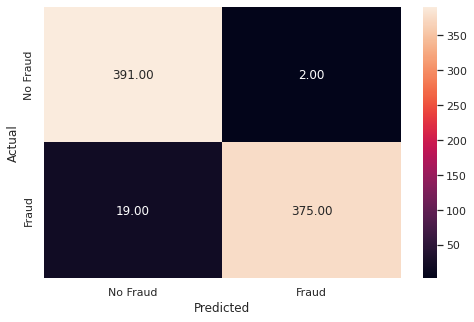

In [201]:
#Predict for train set
y_train_pred = lr.predict(X_train_scld)
#checking the performance on the train dataset
metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.91      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



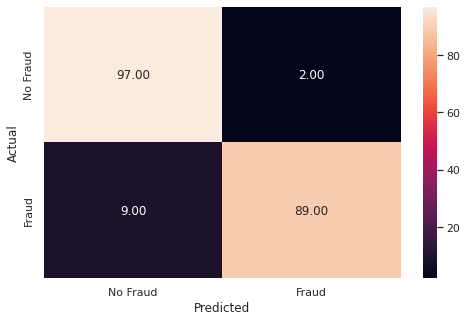

In [202]:
#Predict for test set
y_test_pred = lr.predict(X_test_scld)
#checking the performance on the test dataset
metrics_score(y_test, y_test_pred)

In [203]:
# The importance of coefficients of logistic regression
coef = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_.tolist()[0])), columns=['features', 'coef'])

coef.sort_values(by = 'coef', ascending = False)

,features,coef
0,Time,2.066962
4,V4,1.965203
11,V11,0.834300
29,Amount,0.710524
2,V2,0.316726
1,V1,0.253061
21,V21,0.236841
22,V22,0.234086
28,V28,0.191962
25,V25,0.177162


In [204]:
# we can change the threshold of the classifier, in order to do that we need the prediction output to be probability.


lr_mod = LogisticRegression(class_weight= {0: .5, 1: .5},random_state =1)

lr_mod.fit(X_train_scld,y_train)


THRESHOLD = 0.50 

y_test_pred_mod = lr_mod.predict_proba(X_test_scld)[:,1]

y_test_pred_mod_cl = np.where(y_test_pred_mod>THRESHOLD,1,0)

In [205]:
#plot precision-recall curve to help find the optimal threshold 
from sklearn.metrics import precision_recall_curve

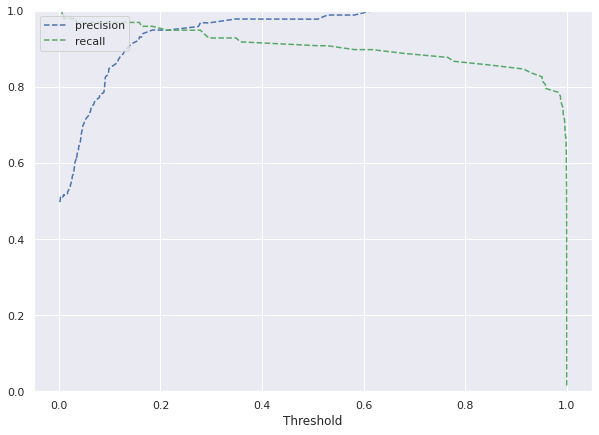

In [206]:
# Plot values of precisions, recalls, and thresholds
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, y_test_pred_mod)

plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')

plt.ylim([0, 1])
plt.show()

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.88      0.93        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



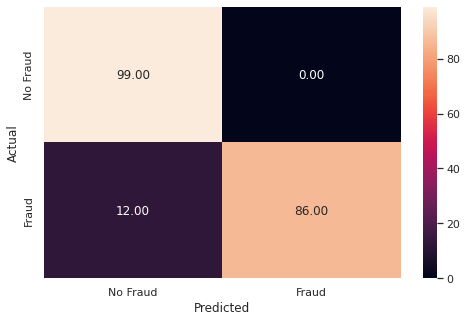

In [207]:
#if we use 0.70 as the threshold

lr_mod_70 = LogisticRegression(class_weight= {0: .5, 1: .5},random_state =1)

lr_mod_70.fit(X_train_scld,y_train)

THRESHOLD = 0.70

y_test_pred_mod_70 = np.where(lr_mod_70.predict_proba(X_test_scld)[:,1]>THRESHOLD,1,0)

metrics_score(y_test, y_test_pred_mod_70)

### **Build a Decision Tree Model**

In [208]:
#Defining Decision tree model with class weights class_weight={0: .5, 1: .5}

d_tree = DecisionTreeClassifier(random_state = 1, class_weight = {0: .5, 1: .5})

In [209]:
#fitting Decision tree model

d_tree.fit(X_train_scld, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



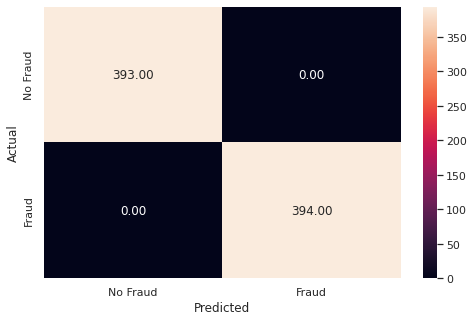

In [210]:
# Checking performance on the training data

y_pred_train1 = d_tree.predict(X_train_scld)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.98      0.99        98

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197



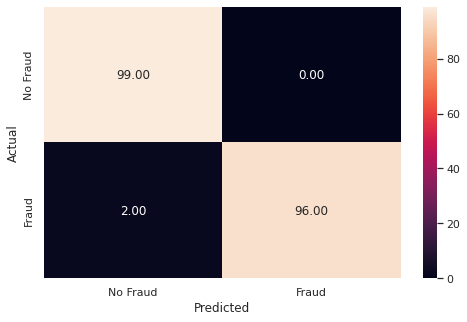

In [211]:
# Checking performance on the testing data

y_pred_test1 = d_tree.predict(X_test_scld)

metrics_score(y_test, y_pred_test1)

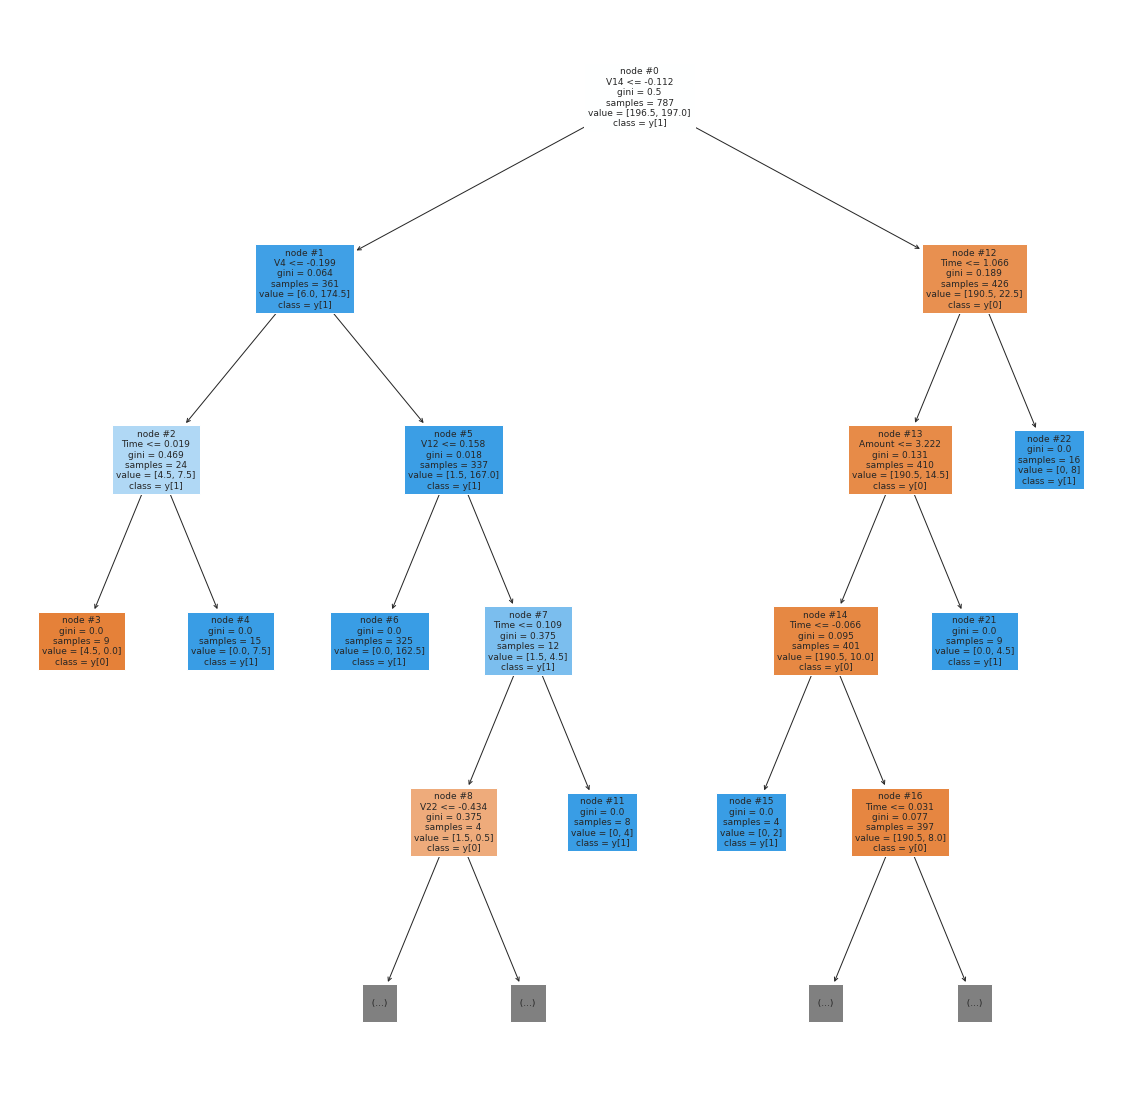

In [212]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True, max_depth = 4)

plt.show()

### **Decision Tree - Hyperparameter Tuning**

In [213]:
# Choose the type of classifier. 

d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: .5, 1: .5})


# Grid of parameters to choose from

parameters = {'max_depth': np.arange(5, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)
                                                           

# Run the grid search

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train_scld, y_train)


# Set the clf to the best combination of parameters

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

d_tree_tuned.fit(X_train_scld, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       393
           1       0.99      0.98      0.98       394

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787



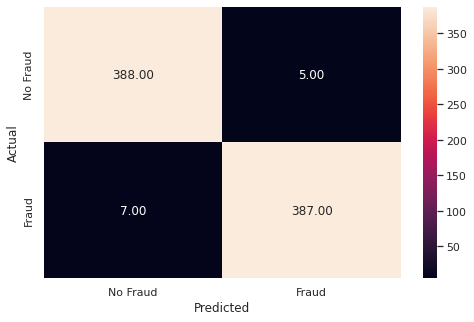

In [214]:
# Checking performance on the training data based on the tuned model

y_pred_train2 = d_tree_tuned.predict(X_train_scld)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



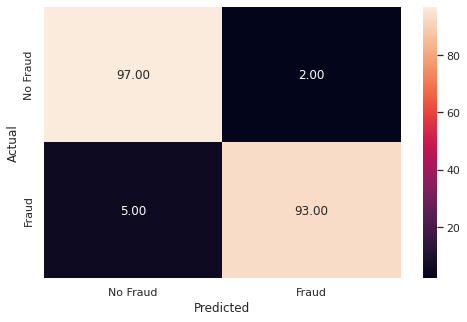

In [215]:
# Checking performance on the testing data based on the tuned model

y_pred_test2 = d_tree_tuned.predict(X_test_scld)

metrics_score(y_test, y_pred_test2)

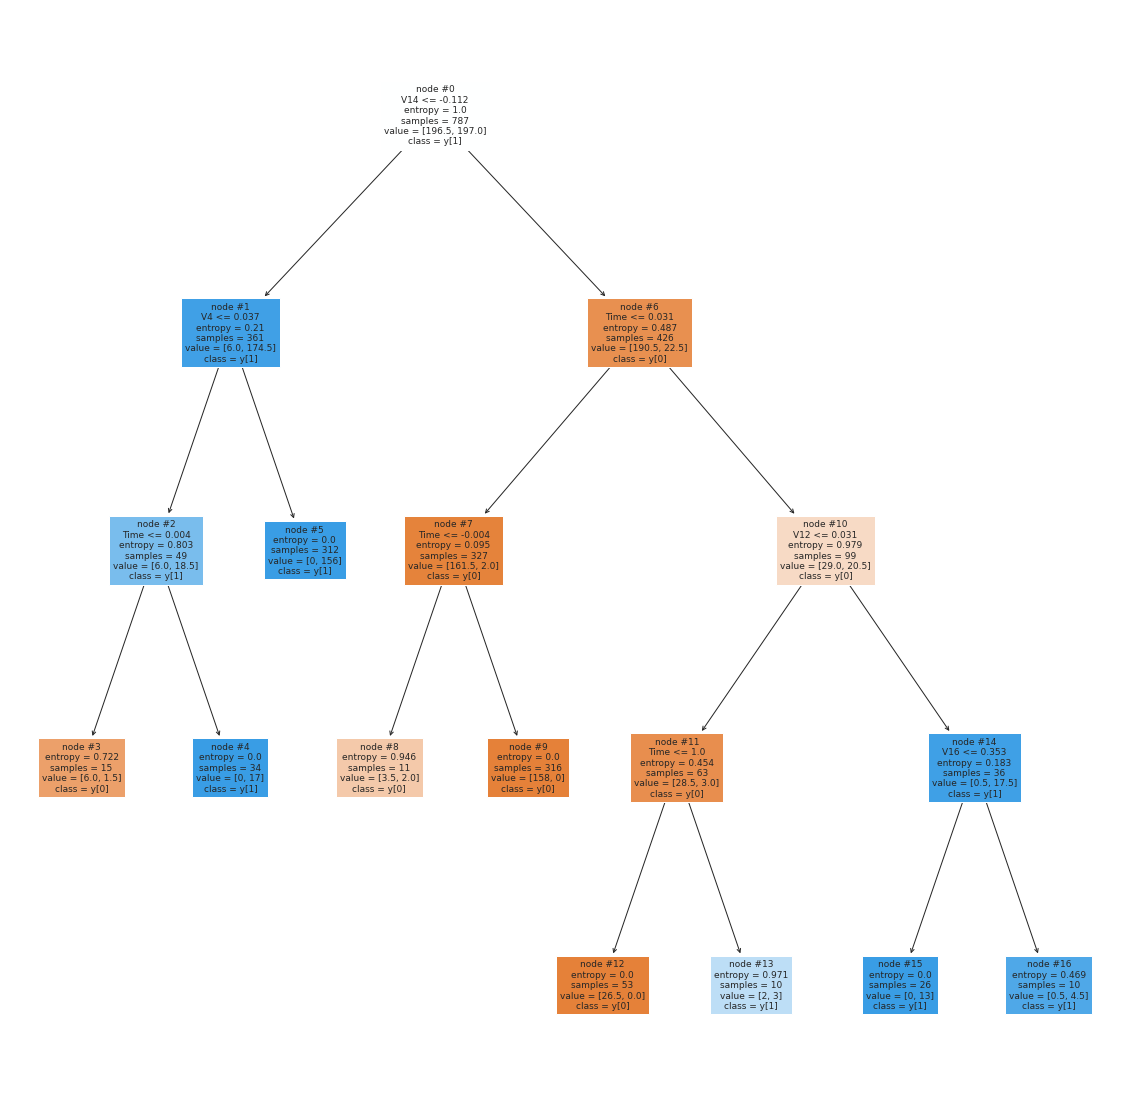

In [216]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [217]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

             Imp
V14     0.670448
Time    0.196181
V12     0.082126
V4      0.048712
V16     0.002532
V26     0.000000
V25     0.000000
V24     0.000000
V17     0.000000
V22     0.000000
V21     0.000000
V20     0.000000
V27     0.000000
V19     0.000000
V28     0.000000
V18     0.000000
V23     0.000000
V15     0.000000
V1      0.000000
V13     0.000000
V11     0.000000
V10     0.000000
V9      0.000000
V8      0.000000
V7      0.000000
V6      0.000000
V5      0.000000
V3      0.000000
V2      0.000000
Amount  0.000000


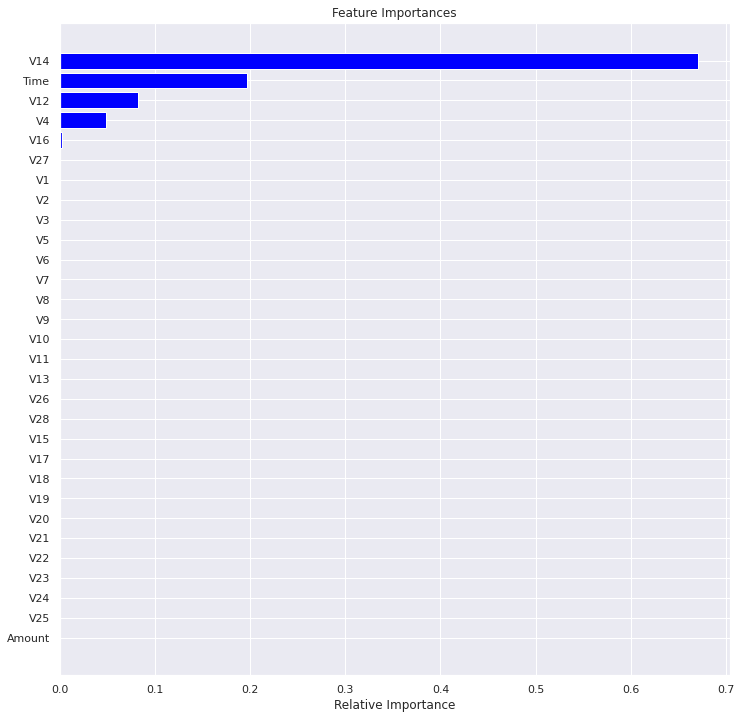

In [218]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Building a Random Forest Classifier**

In [219]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(X_train_scld,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



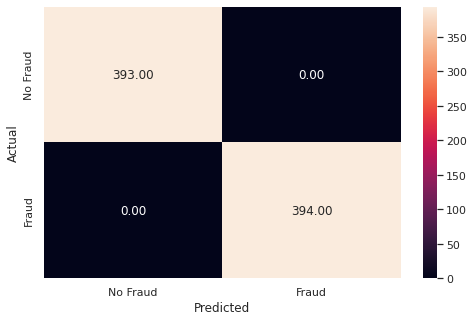

In [220]:
#Checking performance on the training data

y_pred_train3 = rf_estimator.predict(X_train_scld)

metrics_score(y_train,y_pred_train3)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.99      0.94      0.96        98

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



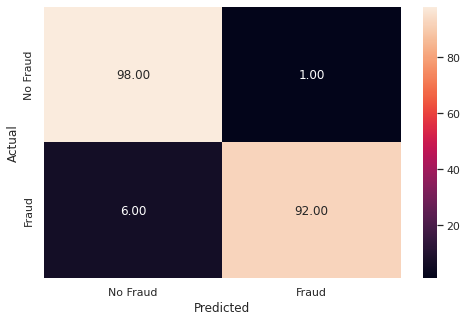

In [221]:
# Checking performance on the test data

y_pred_test3 = rf_estimator.predict(X_test_scld)

metrics_score(y_test,y_pred_test3)

In [222]:
# Defining Random Forest model with class weights class_weight={0: .5, 1: .5}

rf_estimator_cw= RandomForestClassifier(random_state=1, class_weight={0: .5, 1: .5})

# Fitting Random Forest model

rf_estimator_cw.fit(X_train_scld,y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



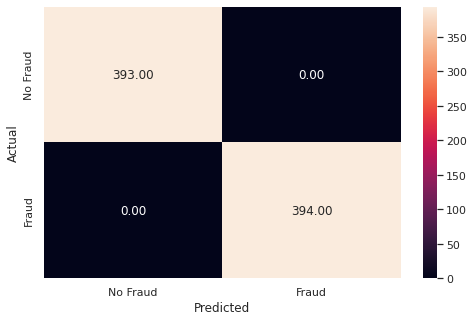

In [223]:
# Checking performance on the train data

y_pred_train4 = rf_estimator_cw.predict(X_train_scld)

metrics_score(y_train,y_pred_train4)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.99      0.94      0.96        98

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



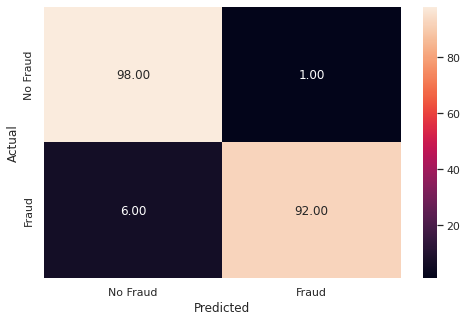

In [224]:
# Checking performance on the test data

y_pred_test4 = rf_estimator_cw.predict(X_test_scld)

metrics_score(y_test,y_pred_test4)

### **Tuning the Random Forest**

In [225]:
# Choose the type of classifier. 

rf_estimator_tuned = RandomForestClassifier(random_state = 1)


# Grid of parameters to choose from

parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "min_samples_leaf": [15,20],
    "max_features": ["auto", "sqrt"],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced"]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 10)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train_scld, y_train)


# Set the clf to the best combination of parameters

rf_estimator_tuned_base = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

rf_estimator_tuned_base.fit(X_train_scld, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', max_samples=0.9,
                       min_samples_leaf=15, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       393
           1       0.99      0.93      0.96       394

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



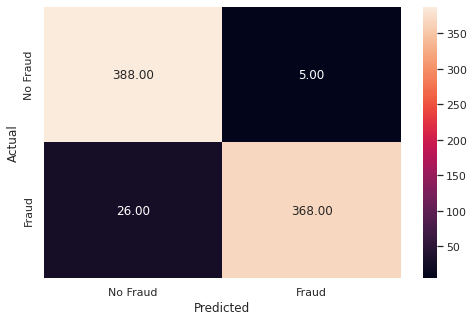

In [226]:
# Checking performance on the training data

y_pred_train6 = rf_estimator_tuned_base.predict(X_train_scld)

metrics_score(y_train, y_pred_train6)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



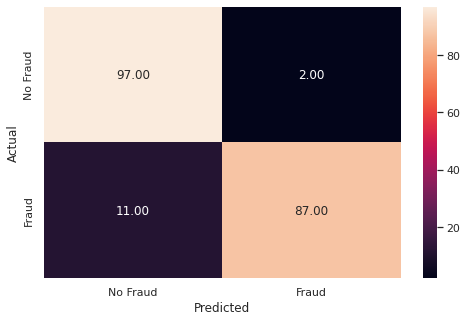

In [227]:
# Checking performace on test dataset

y_pred_test6 = rf_estimator_tuned_base.predict(X_test_scld)

metrics_score(y_test, y_pred_test6)

In [228]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

print (pd.DataFrame(rf_estimator_tuned_base.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


             Imp
V14     0.227114
V4      0.103375
V10     0.101131
V17     0.093994
V11     0.091437
V3      0.086632
V16     0.063556
Time    0.050477
V12     0.045213
V7      0.022858
V2      0.022745
V21     0.016610
Amount  0.015890
V6      0.011368
V9      0.010424
V18     0.006491
V23     0.004857
V1      0.004554
V8      0.003378
V27     0.003300
V20     0.002838
V13     0.002616
V19     0.002322
V15     0.002179
V5      0.001650
V28     0.001079
V24     0.000780
V22     0.000628
V25     0.000255
V26     0.000250


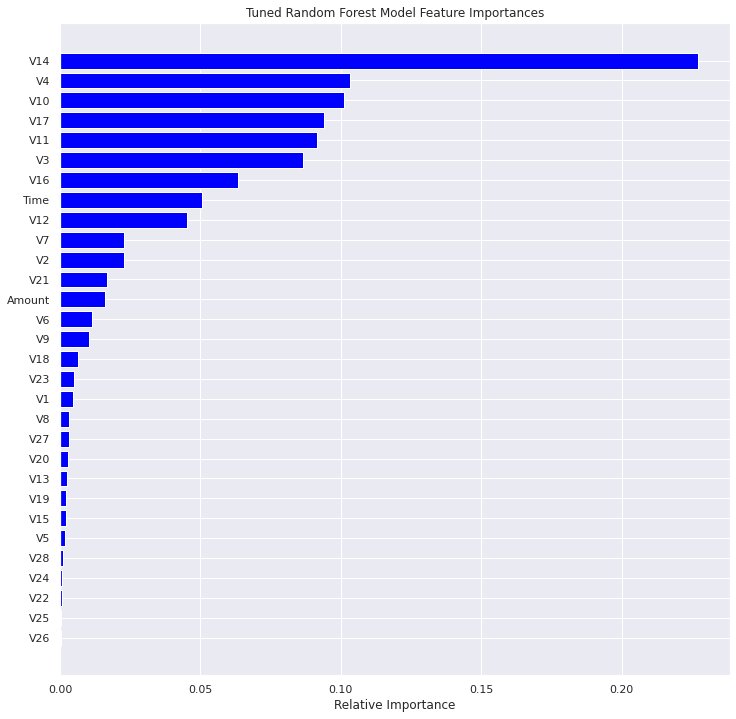

In [229]:
importances = rf_estimator_tuned_base.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Tuned Random Forest Model Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **XGBoost**

In [230]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [231]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.98      0.99        98

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197



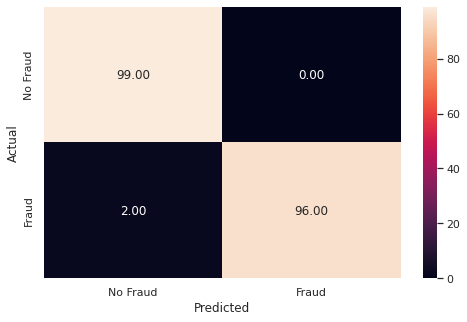

In [232]:
# XGBoost Regressor
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train_scld,y_train)

# Model Performance on the test data

y_pred_test8 = xgb.predict(X_test_scld)

metrics_score(y_test, y_pred_test8)

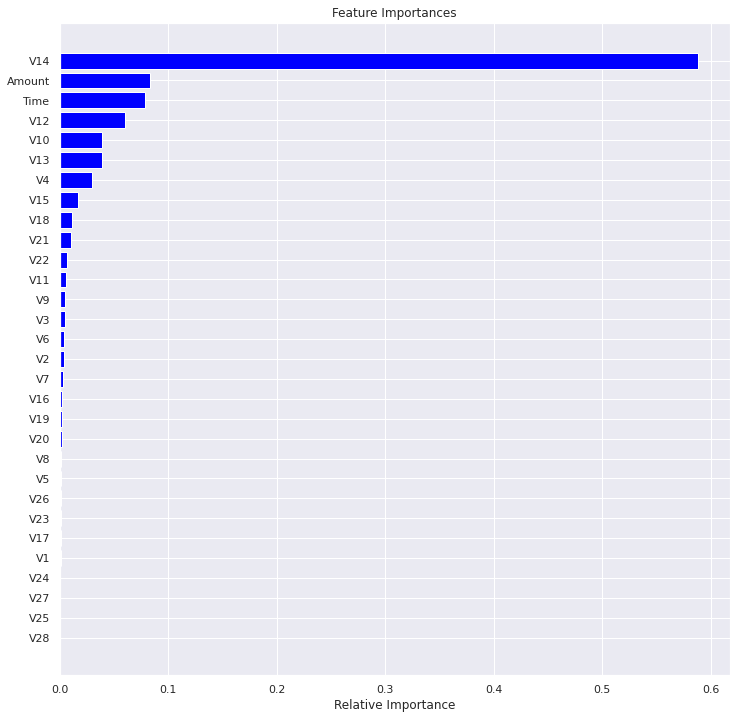

In [233]:
importances = xgb.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

In [234]:
def get_recall_score(model,flag=True,X_train=X_train_scld,X_test=X_test_scld):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [235]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train_scld,X_test=X_test_scld):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [236]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train_scld,X_test=X_test_scld):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [237]:
# Make the list of all the model names 

models = [d_tree,d_tree_tuned,rf_estimator,rf_estimator_cw,rf_estimator_tuned_base,xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [238]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Decision_tree','Decision_tree_tuned','Random_forest','Random_forest_cw','Tandon_forest_tuned','XGB'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision_tree,1.000000,0.989848,1.000000,0.979592,1.000000,1.000000
1,Decision_tree_tuned,0.984752,0.964467,0.982234,0.948980,0.987245,0.978947
2,Random_forest,1.000000,0.964467,1.000000,0.938776,1.000000,0.989247
3,Random_forest_cw,1.000000,0.964467,1.000000,0.938776,1.000000,0.989247
4,Tandon_forest_tuned,0.960610,0.934010,0.934010,0.887755,0.986595,0.977528
5,XGB,1.000000,0.989848,1.000000,0.979592,1.000000,1.000000


In [239]:
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [240]:
# Create SHAP explainer 
explainer = shap.TreeExplainer(xgb_tuned)
# Calculate shapley value of the test data set
shap_values = explainer.shap_values(X_test)

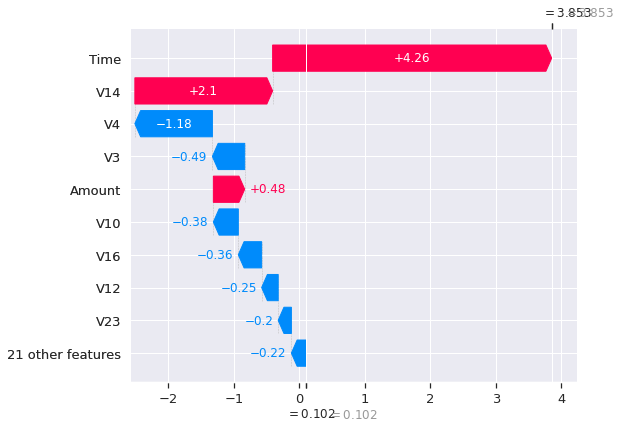

In [241]:
#plot the feature impact for a random input sample

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[150],feature_names=X_test.columns)

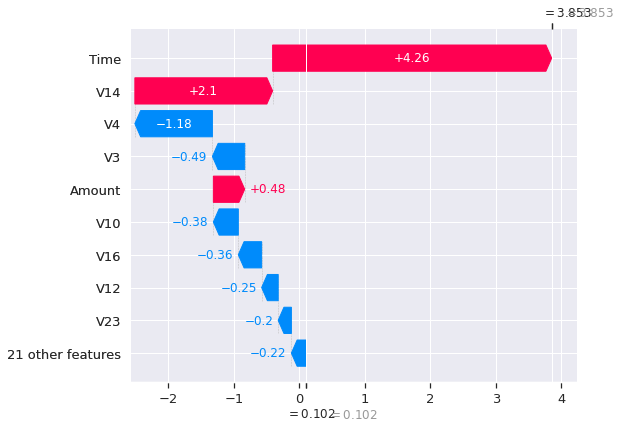

In [242]:
#plot the feature impact for a random input sample

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[150],feature_names=X_test.columns)

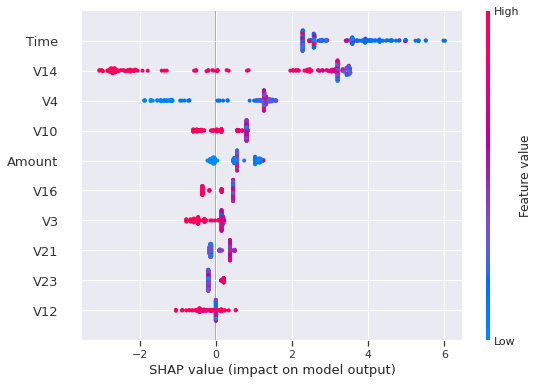

In [243]:
#plot the summary plot to see the impact of each feature on the model output

shap.summary_plot(shap_values, X_test, max_display = 10)

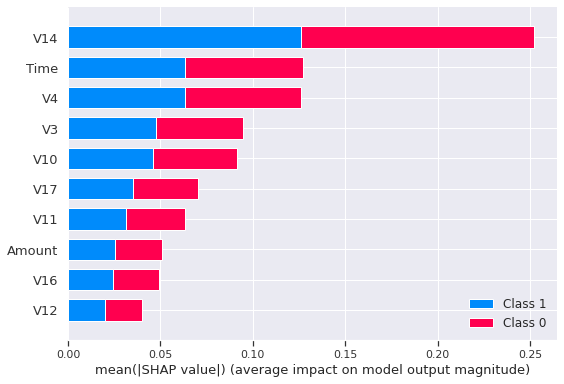

In [244]:
# Create SHAP explainer for tuned random forest model
explainer = shap.TreeExplainer(rf_estimator_tuned_base)
# Calculate shapley value of the test data set
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display = 10)